In [ ]:
# 코랩 폰트 깨짐 해결 ( plt.rc('font', family='NanumBarunGothic') )
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,137 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121752 files and dire

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [ ]:
file1 = r'/content/drive/MyDrive/실습/discomfort_raw.csv'
discomfort_raw = pd.read_csv(file1)

In [ ]:
file2 = r'/content/drive/MyDrive/실습/subway_raw.csv'
subway_raw = pd.read_csv(file2)

In [ ]:
discomfort_raw.head(3)

,일시,연월,월일,요일,시간대,기온(도),습도(%),불쾌지수
0,2019-01-01 12:00:00,2019-01,01-01,화,12,-2.8,47,36.00816
1,2019-01-02 12:00:00,2019-01,01-02,수,12,-2.8,29,39.08112
2,2019-01-03 12:00:00,2019-01,01-03,목,12,-0.4,26,42.15504


In [ ]:
subway_raw.head(3)

,사용일자,요일,노선명,역명,승차총승객수,하차총승객수,승하차총승객수,연월,월일,등록일자
0,2019-01-01,화,2호선,을지로4가,3862.0,3728.0,7590.0,2019-01,01-01,20190104
1,2019-01-01,화,3호선,을지로3가,8104.0,7554.0,15658.0,2019-01,01-01,20190104
2,2019-01-01,화,2호선,을지로입구,22478.0,21330.0,43808.0,2019-01,01-01,20190104


In [ ]:
subway_raw=subway_raw.groupby('월일', as_index = False)\
                      .agg(일별_승하차총승객수=('승하차총승객수', 'sum'))\
                      .reset_index(drop=True)

In [ ]:
subway_raw.head(3)

,월일,일별_승하차총승객수
0,01-01,6813453.0
1,01-02,15214002.0
2,01-03,15716213.0


In [ ]:
merge_outer=pd.merge(discomfort_raw, subway_raw, how='inner', on='월일')
merge_outer.head(3)

,일시,연월,월일,요일,시간대,기온(도),습도(%),불쾌지수,일별_승하차총승객수
0,2019-01-01 12:00:00,2019-01,01-01,화,12,-2.8,47,36.00816,6813453.0
1,2019-01-02 12:00:00,2019-01,01-02,수,12,-2.8,29,39.08112,15214002.0
2,2019-01-03 12:00:00,2019-01,01-03,목,12,-0.4,26,42.15504,15716213.0


In [ ]:
merge_outer=merge_outer.drop('일시', axis=1)

In [ ]:
cols=['기온(도)','불쾌지수', '일별_승하차총승객수']
round(merge_outer[cols].corr(), 2)

,기온(도),불쾌지수,일별_승하차총승객수
기온(도),1.00,0.99,0.17
불쾌지수,0.99,1.00,0.17
일별_승하차총승객수,0.17,0.17,1.00


In [ ]:
import scipy.stats as spst

spst.pearsonr(merge_outer['불쾌지수'], merge_outer['일별_승하차총승객수'])

PearsonRResult(statistic=0.1735864869768784, pvalue=0.019441389705018474)

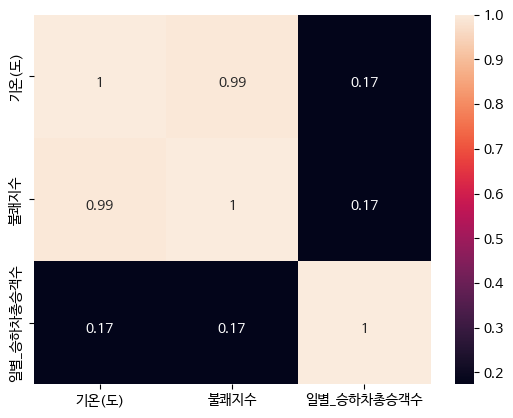

In [ ]:
corr=merge_outer[cols].corr()
annot_kws={'ha':'center','va':'top'}
sns.heatmap(data=corr, annot=True, annot_kws=annot_kws)
plt.rc('font', family='NanumBarunGothic')